## HR Analytics classification task EDA

In [1]:
# Import the libraries and set the style for plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('aug_train.csv')

In [3]:
# dimensions of the dataframe
data.shape

(19158, 14)

In [4]:
# data types of all the columns
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [5]:
# the first 5 rows
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
# the last 5 rows
data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


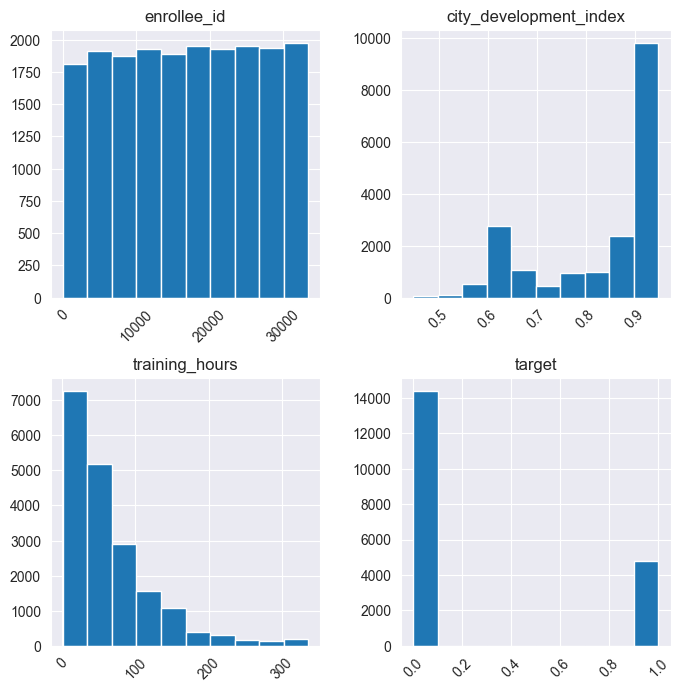

In [7]:
# Create a display histograms in a grid of all the numeric features
data.hist(figsize=(8,8), xrot=45)
plt.show()

Training hours is really the only numerical variable that seems relevant here.

In [8]:
# display the summary statistics of the numeric features
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


<Axes: xlabel='training_hours'>

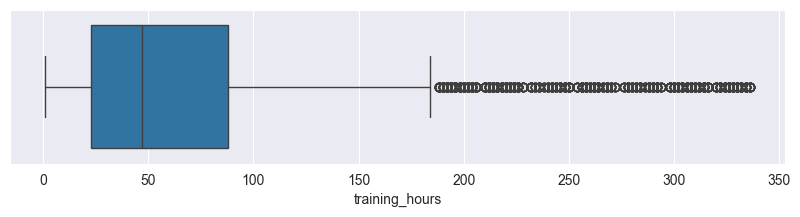

In [9]:
# Further analyse the training_hours with a boxplot to check if there are outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['training_hours'])

The boxplot above confirmed that the data points to the extreme right are indeed outliers. But they would still be important to the model since they do not seem to be data entry errors.

In [10]:
# summary statistics of the categorical features
data.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Every categorical feature other than city and relevant_experience have missing values

### Distribution of categorical features

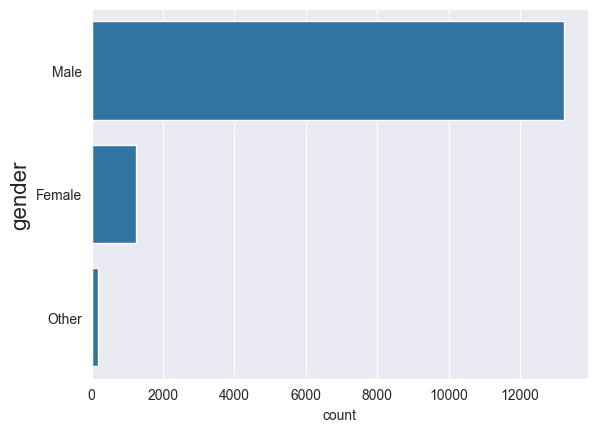

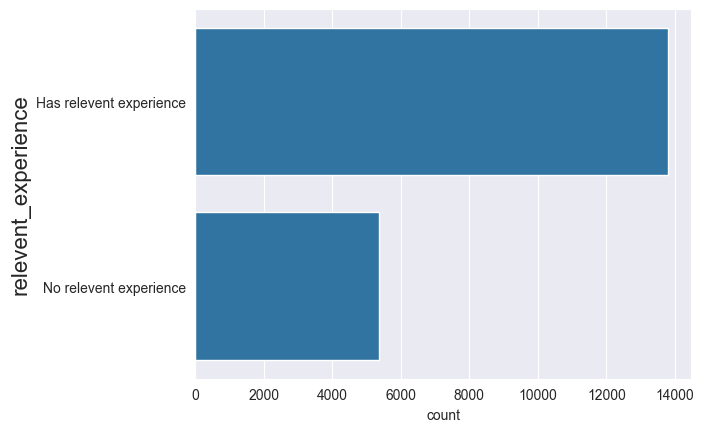

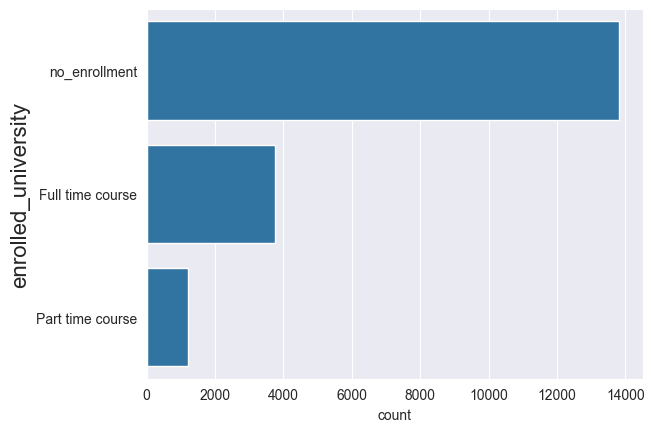

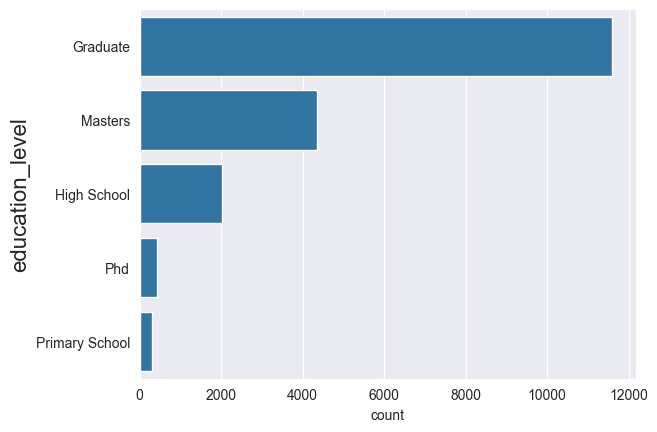

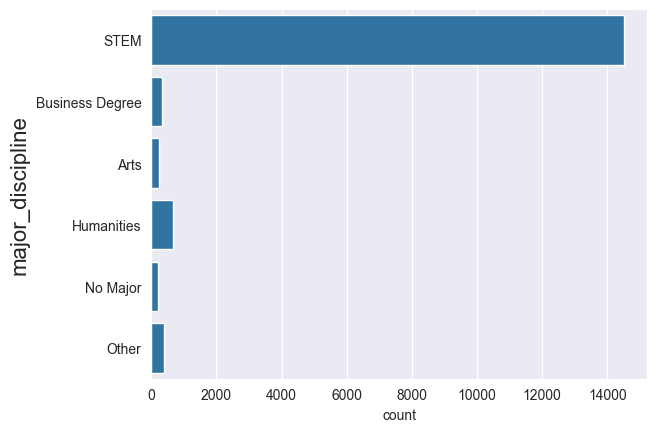

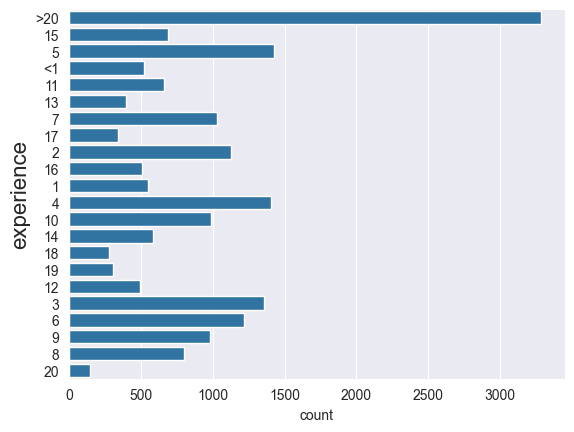

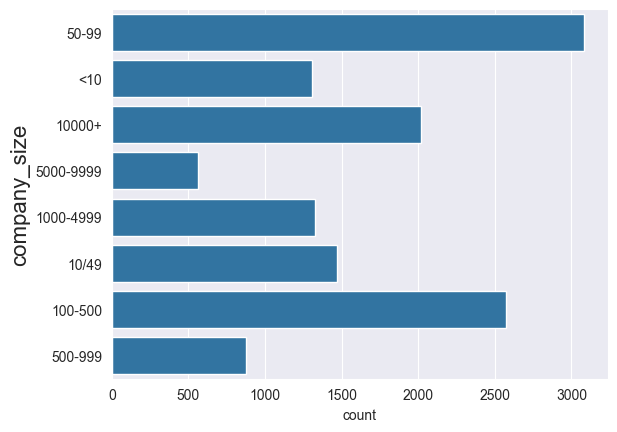

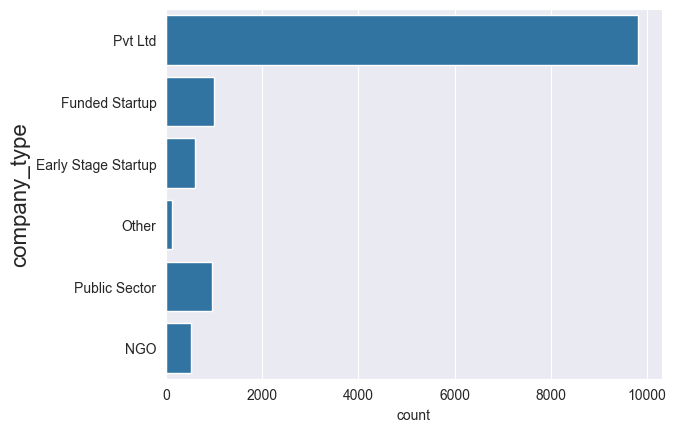

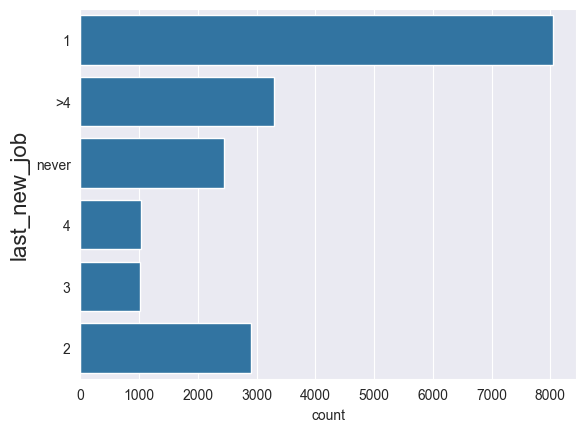

In [11]:
# display a countplot for each categorical feature with 22 or fewer unique classes
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        sns.countplot(y=col, data=data)
        plt.ylabel(col, fontsize=16) #Increase the font of column label
        plt.show()

#### On the fly data cleaning
We can convert 'experience' and 'last_new_job' into numeric features so that we can observe statistics such as average experience level and standard deviation of the years between current job and last job.

In [12]:
# Replace '>20' with '21', then convert to float
data['experience_num'] = data['experience'].replace({'>20':'21', '<1': '0'}).astype(float)

# Replace '>4' with '5', then convert to float
data['last_new_job_num'] = data['last_new_job'].replace({'>4':'5','never':'0'}).astype(float)

#### Segment target by numerical features

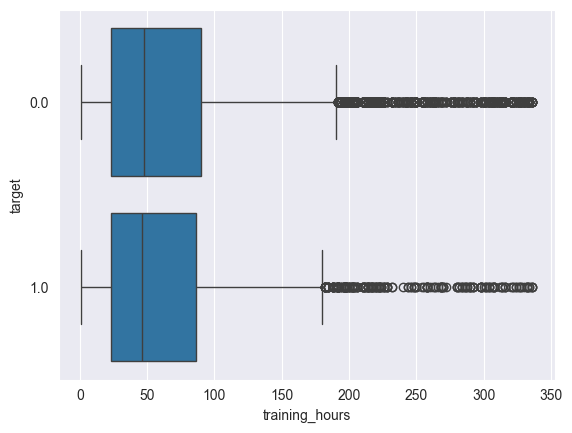

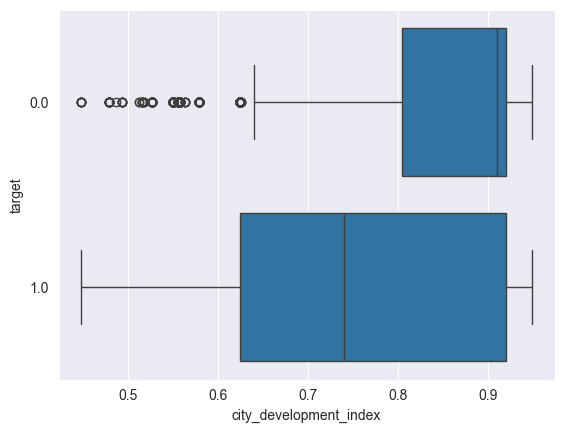

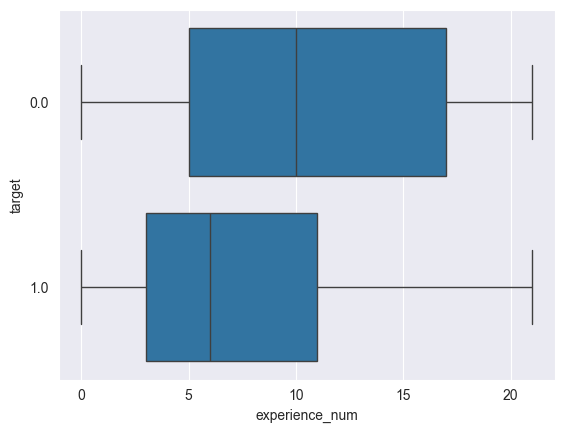

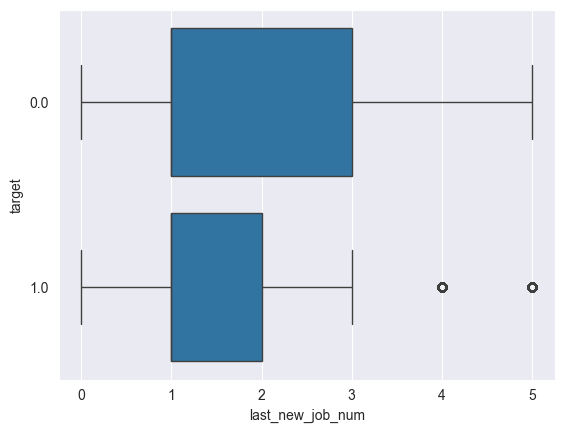

In [13]:
# segment the target feature by the numeric features to observe how they change together
num_cols = ['training_hours','city_development_index', 'experience_num', 'last_new_job_num']
for col in num_cols:
    sns.boxplot(y = data['target'].astype('category'), x = col, data=data)
    plt.show()

The training hours do not affect the target.

### Target feature vs the other categorical features
#### Cross tab
We use crosstab because the target is a numeric feature. If it was categorical, use boxplot or violin plot, as shown further down below

Using crosstab to show tables of target vs categorical features

In [14]:
pd.crosstab(data['target'], data['gender'])

gender,Female,Male,Other
target,,,
0.0,912,10209,141
1.0,326,3012,50


In [15]:
# display crosstabs of the target with categorical features containing 4 or fewer unique classes
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <=4:
        # display(pd.crosstab(data['target'], data[col], normalize='index'))
        display(pd.crosstab(data['target'], data[col],  margins = True))

gender,Female,Male,Other,All
target,,,,
0.0,912,10209,141,11262
1.0,326,3012,50,3388
All,1238,13221,191,14650


relevent_experience,Has relevent experience,No relevent experience,All
target,,,
0.0,10831,3550,14381
1.0,2961,1816,4777
All,13792,5366,19158


enrolled_university,Full time course,Part time course,no_enrollment,All
target,,,,
0.0,2326,896,10896,14118
1.0,1431,302,2921,4654
All,3757,1198,13817,18772


In [16]:
# crosstab like above, except with the values normalized to display percentages.
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 4:
        display(pd.crosstab(data['target'], data[col], 
                            normalize='index', 
                            margins = True, # Display the total at the bottom
                            margins_name = 'Total').round(2)) # Changes the results label from 'All' to 'Total'

gender,Female,Male,Other
target,,,
0.0,0.08,0.91,0.01
1.0,0.10,0.89,0.01
Total,0.08,0.90,0.01


relevent_experience,Has relevent experience,No relevent experience
target,,
0.0,0.75,0.25
1.0,0.62,0.38
Total,0.72,0.28


enrolled_university,Full time course,Part time course,no_enrollment
target,,,
0.0,0.16,0.06,0.77
1.0,0.31,0.06,0.63
Total,0.20,0.06,0.74


### Target across categorical features

Using only 3 categorical features - those with less than 4 classes

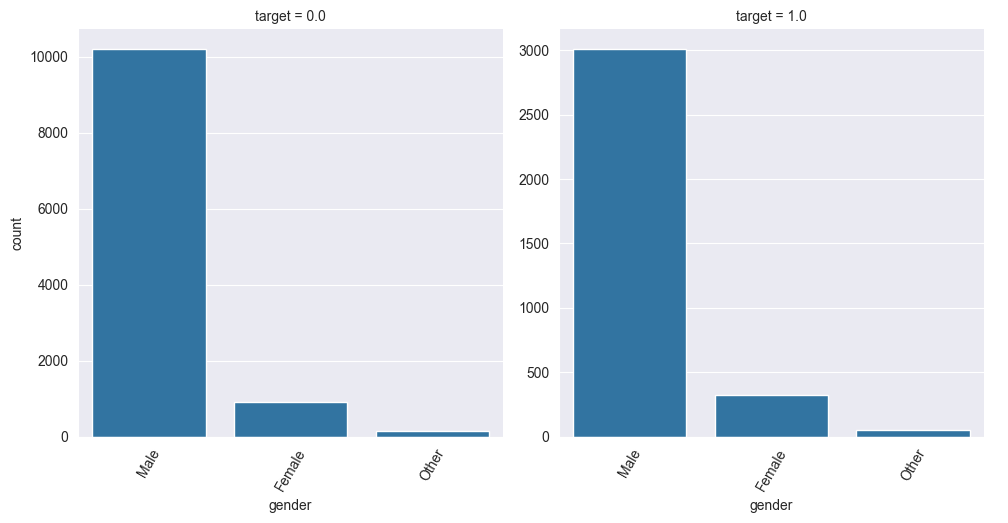

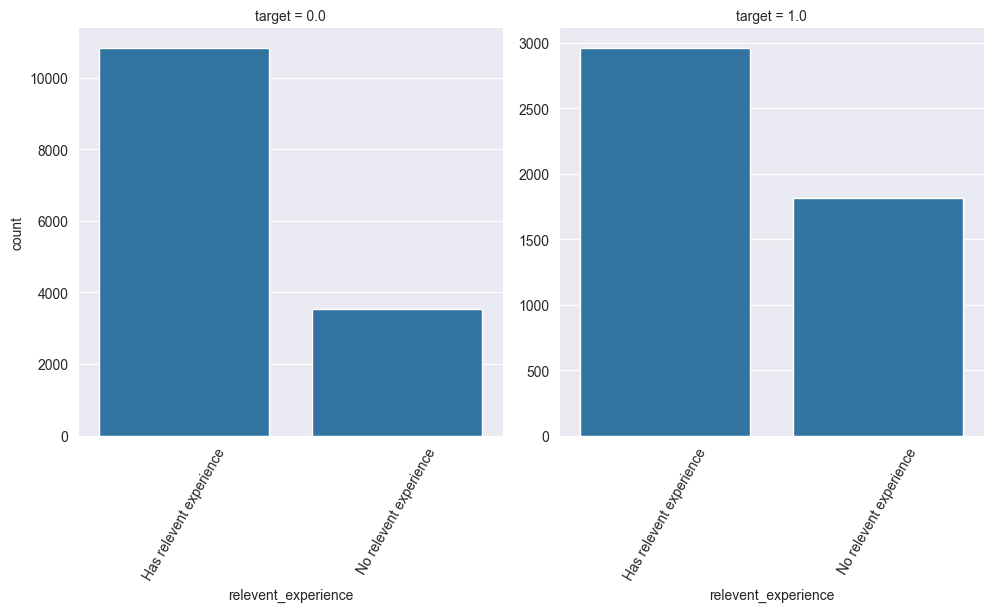

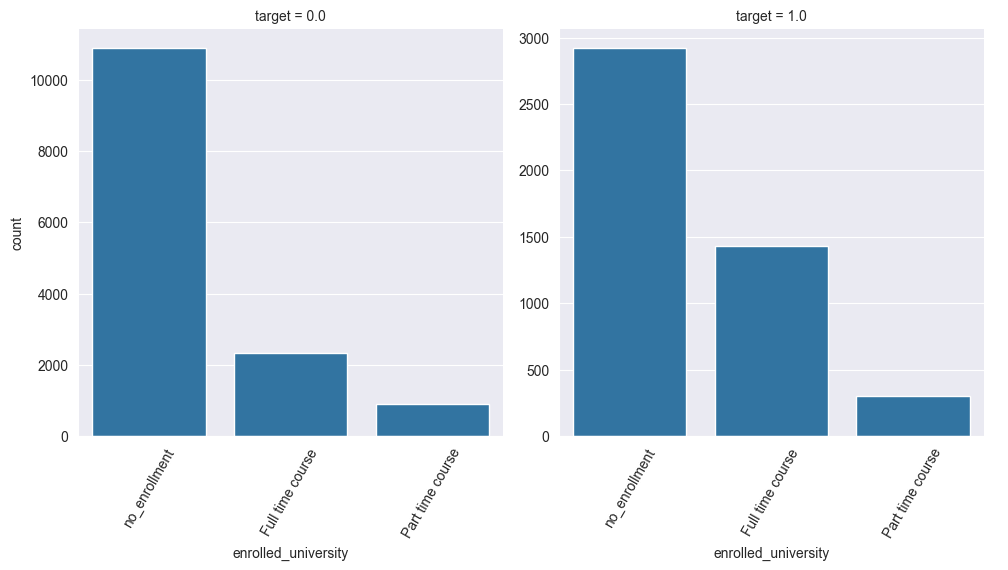

In [17]:
# display countplots showing relationships between the target and the categorical features with 4 classes or fewer
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 4:
        g = sns.catplot(x = col, kind='count', 
                        col = 'target', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

Using all categorical features with classes less than or equal to 22

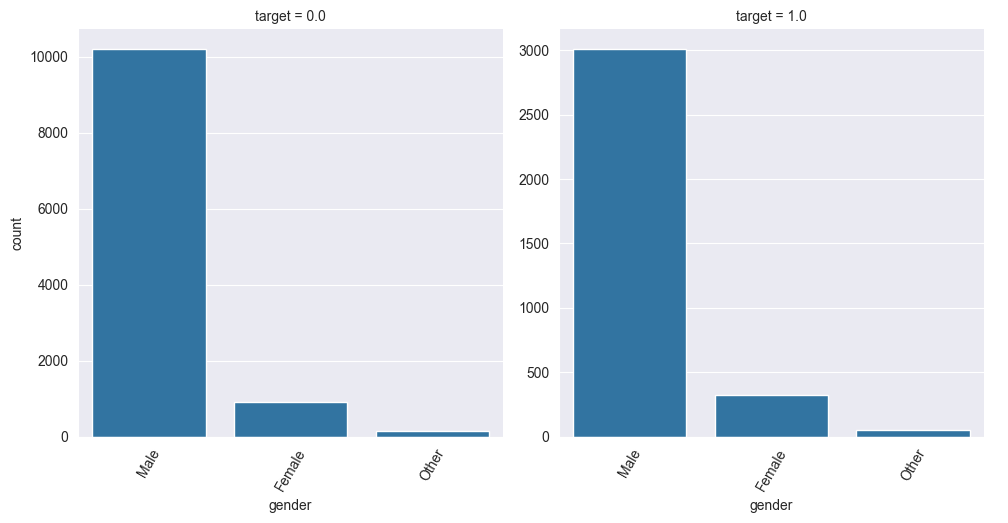

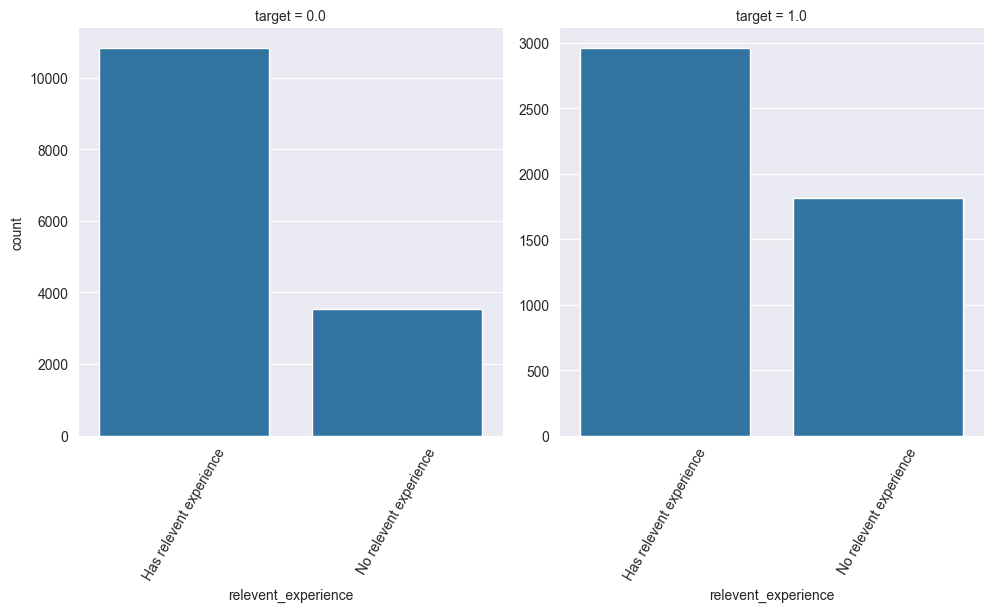

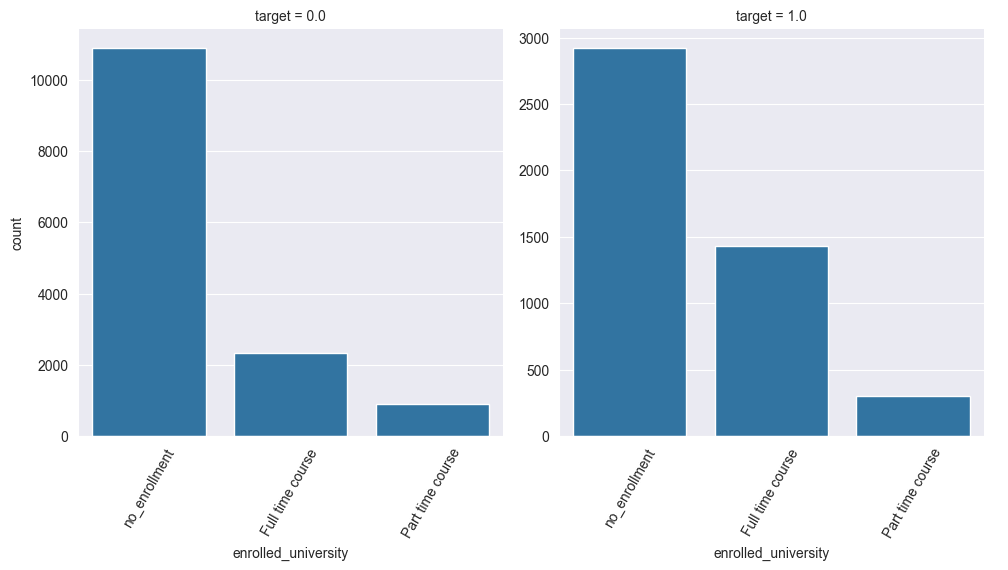

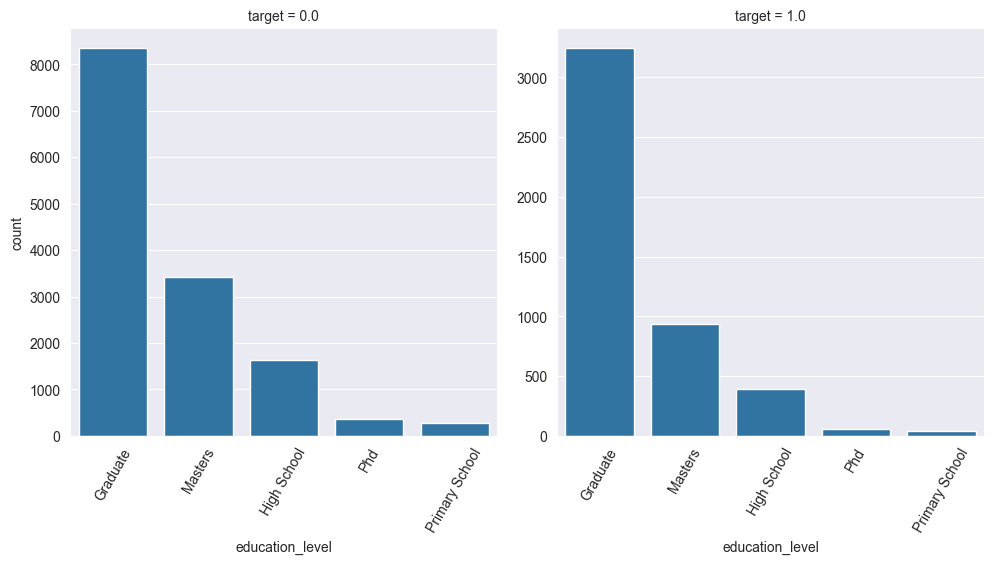

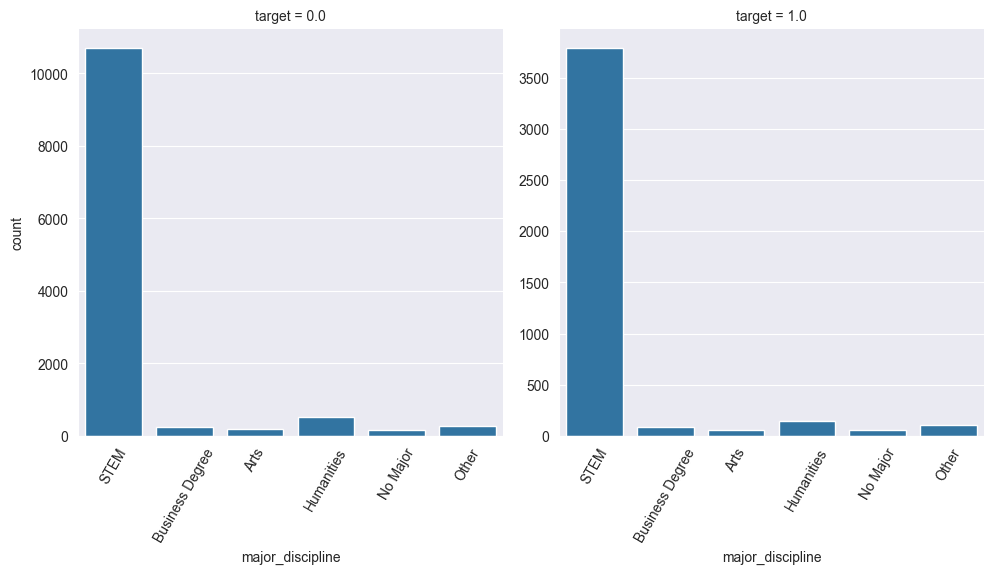

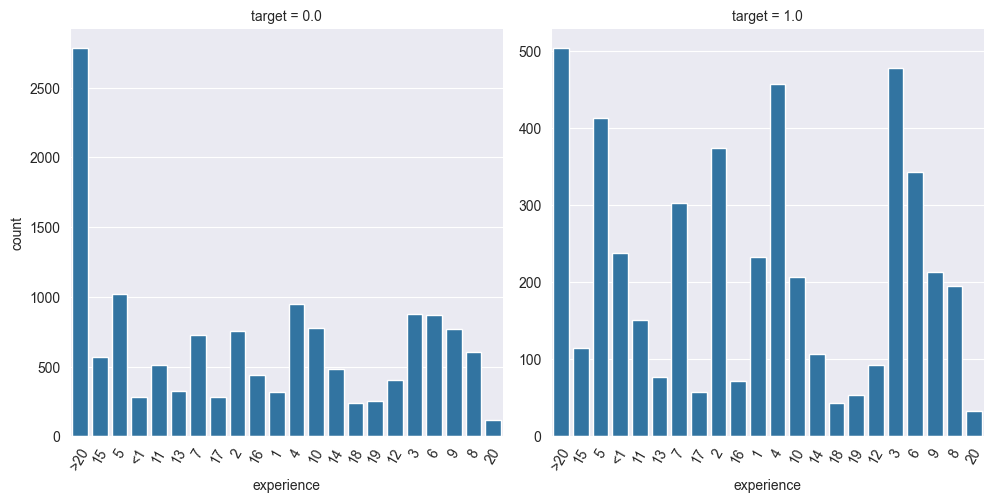

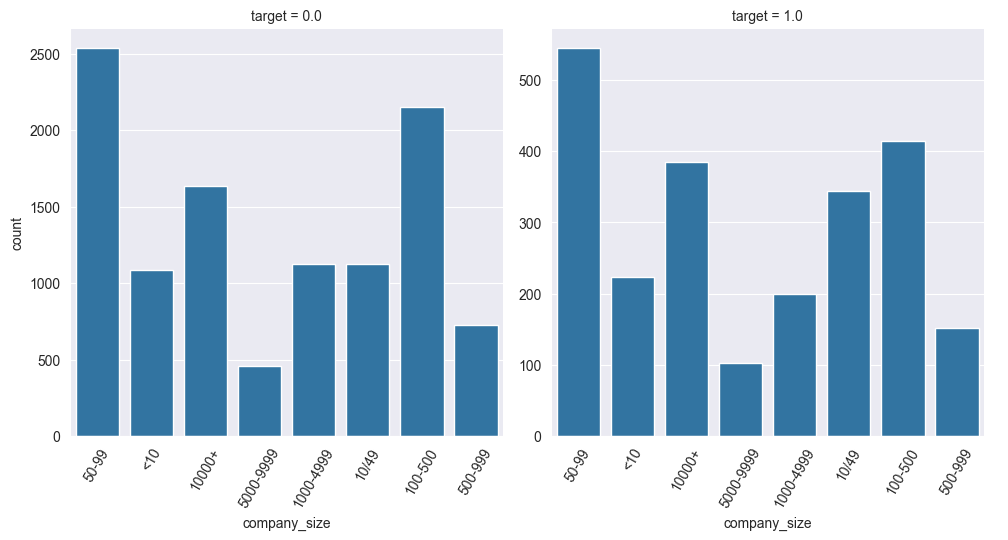

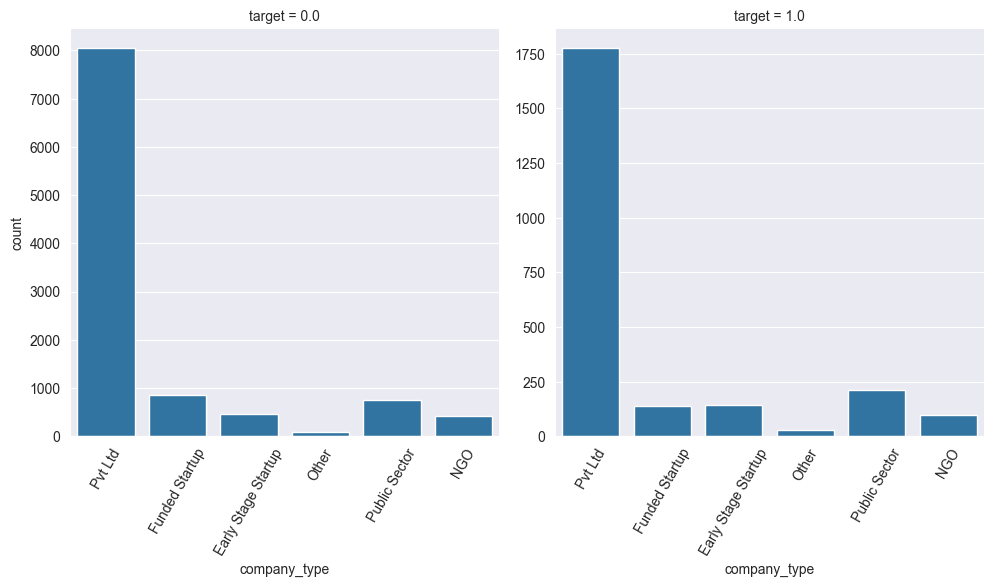

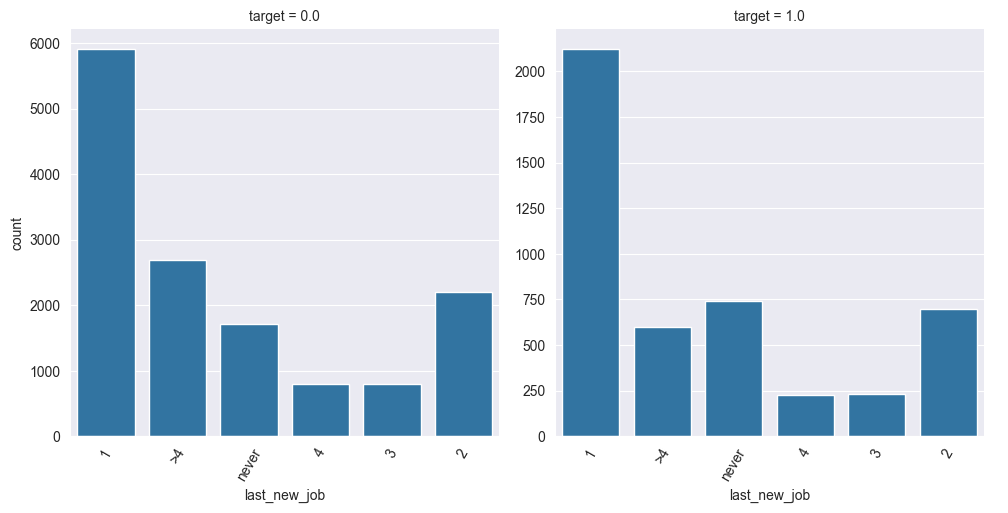

In [18]:
# display countplots showing relationships between the target and the categorical features with 22 classes or fewer
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        g = sns.catplot(x = col, kind='count', col = 'target', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

You can also use FacetGrid

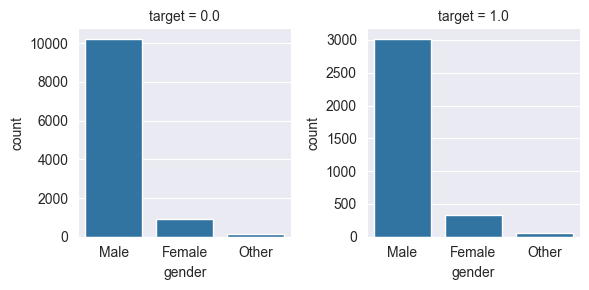

In [19]:
# a facet grid of the target vs the gender. Same results as above
g = sns.FacetGrid(data, col='target', sharey=False)
g.map(sns.countplot, 'gender', order=['Male','Female','Other'])

### All Categorical vs all numeric features

In [20]:
#using groupby to observe the mean of target classes vs numeric features
numeric_cols = data.select_dtypes(include='number').columns
data.groupby('target')[numeric_cols].mean()

,enrollee_id,city_development_index,training_hours,target,experience_num,last_new_job_num
target,,,,,,
0.0,16601.160907,0.853139,66.113761,0.0,10.789734,2.079649
1.0,17700.819971,0.755719,63.118484,1.0,8.020194,1.758598


In [21]:
# using groupby to check the relationship between categorical classes and the numerical features. The mean is used here
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 3:
        cols = ['training_hours', 'target', 'experience_num', 'last_new_job_num']
        display(data.groupby(col)[cols].mean().round(2))
        # display(data.groupby(col)[cols].agg(['mean', 'median', 'std']))

,training_hours,target,experience_num,last_new_job_num
gender,,,,
Female,65.64,0.26,9.15,1.95
Male,65.30,0.23,10.86,2.10
Other,63.87,0.26,9.08,1.78


,training_hours,target,experience_num,last_new_job_num
relevent_experience,,,,
Has relevent experience,65.80,0.21,11.54,2.26
No relevent experience,64.25,0.34,6.40,1.33


,training_hours,target,experience_num,last_new_job_num
enrolled_university,,,,
Full time course,64.53,0.38,5.76,1.21
Part time course,67.57,0.25,7.98,1.84
no_enrollment,65.36,0.21,11.55,2.24


In [22]:
# Styling the table displayed
# for col in data.select_dtypes(include='object'):
#     if data[col].nunique() <= 3:
#         cols = ['training_hours', 'target', 'experience_num', 'last_new_job_num']
#         # styled = data.groupby(col)[cols].agg(['mean', 'median', 'std']).style
#         styled = data.groupby(col)[cols].mean().round(2).style

#         # Add gridlines and caption
#         styled = styled.set_table_styles([
#             {"selector": "th", "props": [("border", "1px solid black")]},
#             {"selector": "td", "props": [("border", "1px solid black")]}
#         ])

#         display(styled)

#### Correlations

In [23]:
# correlation matrix to show the interactions betweek numeric features
corr = data.select_dtypes(include='number').corr()
corr

,enrollee_id,city_development_index,training_hours,target,experience_num,last_new_job_num
enrollee_id,1.000000,-0.040455,0.000998,0.049475,-0.035509,-0.030693
city_development_index,-0.040455,1.000000,0.001920,-0.341665,0.333967,0.188984
training_hours,0.000998,0.001920,1.000000,-0.021577,0.000908,-0.006276
target,0.049475,-0.341665,-0.021577,1.000000,-0.176724,-0.082607
experience_num,-0.035509,0.333967,0.000908,-0.176724,1.000000,0.479033
last_new_job_num,-0.030693,0.188984,-0.006276,-0.082607,0.479033,1.000000


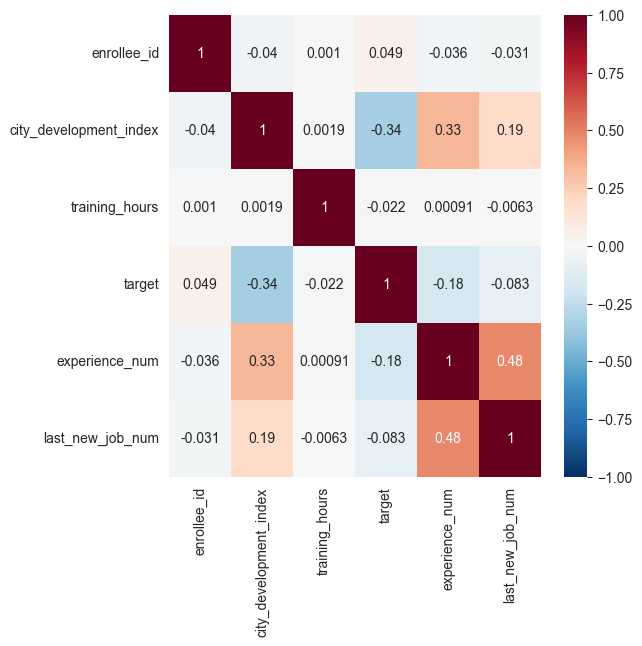

In [24]:
# a heatmap to visualize the correlations of the numeric features
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()